In [1]:
import pickle
import statistics as sts
import seaborn as sns

In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as url
import requests
#import streamlit as st

# so we can see the output side by side
#st.set_page_config(layout="wide")


def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup
   
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass
    
# compare easier
#col1,col2 = st.columns(2)
#with col2:
    #url = input('URL link to scrape')
urls = input("enter link ")
    #creating a loop from 1 to 100 reviews pages of the product
for x in range(1,100):
    soup = get_soup(urls)
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break
print('Done')
import pandas as pd
df = pd.DataFrame(reviewlist)
df['reviews'] = df['title']+" "+df["content"]
df['reviews']

enter link  https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next
Done


0      I am very happy to buy this product... Nice pr...
1      Amazingly Amazon It says 8 hrs but since I use...
2      base king the base is really good. it a value ...
3      The head phone plastic band broken out. This p...
4      Cheap Plastic, Average product.  Sound is dist...
                             ...                        
795    Value for the money Sound is very crystal clea...
796    Don't buy it please... Bass is disgusting... R...
797    Cheap Quality I have used it for 1 month after...
798    After 2 month review Marvelous performanceIf y...
799    Broken within one month!!! I have been a huge ...
Name: reviews, Length: 800, dtype: object

In [5]:
def load_model():
    with open('C:/Users/91960/Downloads/amazon_review/model.pkl', 'rb') as file:
      model = pickle.load(file)
    return model
model = load_model()


#load tf_idf vectorizer
vectorizer = pickle.load(open('C:/Users/91960/Downloads/amazon_review/vectorizer.pkl', "rb"))


import requests
from bs4 import *
from urllib import request


url1 = input("Enter url you want to crawl:")
max_pages1 = int(input("Enter no. of pages you want to crawl:"))


def web_crawler(max_pages,url):
   page = 1
   while page <= max_pages:
      url4 = str(url) + str(page)
      url_get = requests.get(url4)
      plain_text = url_get.text
      soup = BeautifulSoup(plain_text,"html.parser")
      for a in soup.findAll('a',{'rel':'bookmark'}):
          href = a.get('href')
          title = a.string
          #print(title)
          print(href)
          #info_about_web_pages(href)
      page +=1

def info_about_web_pages(url):
   url_get = requests.get(url)
   plain_text = url_get.text
   soup = BeautifulSoup(plain_text,"html.parser" )
   links = set()
   for about in soup.findAll('a'):
       href = about.get('href')
       links.update([href])

   print(links)

web_crawler(max_pages1,url1)

In [6]:
test = vectorizer.transform(df['reviews'])
prediction = model.predict(test)
result = sts.mode(prediction)
if  result == 2:
    print("positive sentiment")
elif result == 1:
    print("nutral sentiment")
else :
    print("negative sentiment")
    


    

positive sentiment


In [7]:
d = {'results':prediction}
pred = pd.DataFrame(data=d)
def lable(score):
    if score == 0:
        return 'Negative'
    elif score == 1:
        return 'Neutral'
    else:
        return 'Positive'
pred['lable'] = pred['results'].apply(lable)    

C:\Users\91960\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lable', ylabel='count'>

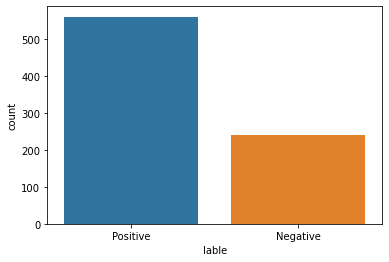

In [8]:
sns.countplot(pred['lable'])

In [9]:
pred['lable'].value_counts()

Positive    560
Negative    240
Name: lable, dtype: int64

In [10]:
prediction

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,

C:\Users\91960\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

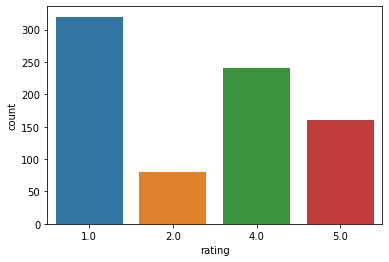

In [11]:
sns.countplot(df['rating'])

https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next